In [1]:
import pandas as pd
import numpy as np
import datetime
#visulization libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Datasets

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(2)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0


In [3]:
df_campaign = pd.read_csv('campaign_data.csv')
df_campaign.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [4]:
df_cust = pd.read_csv('customer_demographics.csv')
df_cust.head(2)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5


In [5]:
df_transaction = pd.read_csv('customer_transaction_data.csv')
df_transaction.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0


In [6]:
df_Item = pd.read_csv('item_data.csv')
df_Item.head(2)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous


# EDA

                                                EDA on Train dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


                                                EDA on Campaign dataset

In [8]:
df_campaign.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [9]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [10]:
#converting start_date and end_date from object to datetime object
df_campaign['start_date'] = pd.to_datetime(df_campaign['start_date'],dayfirst = True)
df_campaign['end_date'] = pd.to_datetime(df_campaign['end_date'],dayfirst=True)
df_campaign.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,2013-12-20
1,25,Y,2013-10-21,2013-11-22


In [11]:
#creating new column 
df_campaign['Diff Start and end date'] = df_campaign['end_date']-df_campaign['start_date']
df_campaign['Diff Start and end date'] = df_campaign['Diff Start and end date']/np.timedelta64(1,'D')
df_campaign.head(2)

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date
0,24,Y,2013-10-21,2013-12-20,60.0
1,25,Y,2013-10-21,2013-11-22,32.0


In [12]:
df_campaign = pd.concat([df_campaign,pd.get_dummies(df_campaign['campaign_type'],drop_first=True)], axis=1)

In [13]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
campaign_id                28 non-null int64
campaign_type              28 non-null object
start_date                 28 non-null datetime64[ns]
end_date                   28 non-null datetime64[ns]
Diff Start and end date    28 non-null float64
Y                          28 non-null uint8
dtypes: datetime64[ns](2), float64(1), int64(1), object(1), uint8(1)
memory usage: 1.2+ KB


In [14]:
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date,Y
0,24,Y,2013-10-21,2013-12-20,60.0,1
1,25,Y,2013-10-21,2013-11-22,32.0,1
2,20,Y,2013-09-07,2013-11-16,70.0,1
3,23,Y,2013-10-08,2013-11-15,38.0,1
4,21,Y,2013-09-16,2013-10-18,32.0,1


C:\Users\Pankaj\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734685.0, 735234.0)

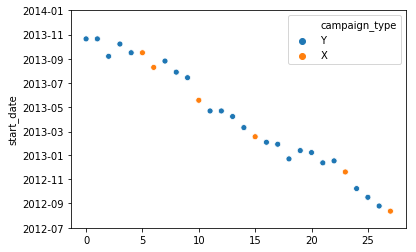

In [15]:
sns.scatterplot(y='start_date',hue='campaign_type',x=df_campaign.index,data=df_campaign)
plt.ylim('2012-07-01','2014-01-01')

                                             EDA on Customer Demographics dataset

In [16]:
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [17]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [18]:
df_cust['age_range'].value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [19]:
df_cust['income_bracket'].value_counts()

5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: income_bracket, dtype: int64

In [20]:
#In column no_of_children filling 'nan' values with '0'
df_cust['no_of_children'].fillna(0,inplace=True)

In [21]:
# Converting data-type of no_of_children column from 'object' to 'category'
df_cust['no_of_children'] = pd.to_numeric(df_cust['no_of_children'],errors='coerce')
df_cust['no_of_children'] = df_cust['no_of_children'].replace(np.nan, 3, regex=True)
df_cust['no_of_children'] = df_cust['no_of_children'].astype('category')

In [22]:
# Converting data-type of family_size column from 'object' to 'category'
df_cust['family_size'] = pd.to_numeric(df_cust['family_size'],errors='coerce')
df_cust['family_size'] = df_cust['family_size'].replace(np.nan, 5, regex=True)
df_cust['family_size'] = df_cust['family_size'].astype('category')

In [23]:
df_cust['marital_status'] = df_cust.apply(lambda row: 1 if row['family_size']-row['no_of_children'] > 1 else 0,axis=1)
df_cust['marital_status'] = df_cust['marital_status'].astype('category')

In [24]:
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,1,0,2.0,0.0,4
1,6,46-55,1,0,2.0,0.0,5
2,7,26-35,1,0,3.0,1.0,3
3,8,26-35,1,0,4.0,2.0,6
4,10,46-55,0,0,1.0,0.0,5


In [25]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null category
rented            760 non-null int64
family_size       760 non-null category
no_of_children    760 non-null category
income_bracket    760 non-null int64
dtypes: category(3), int64(3), object(1)
memory usage: 26.5+ KB


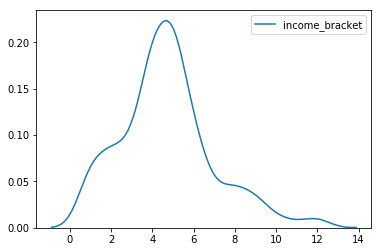

In [26]:
sns.kdeplot(df_cust['income_bracket'])

                                             EDA on Item dataset

In [27]:
df_Item.head(2)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous


In [28]:
df_Item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [29]:
df_Item['brand_type'].value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [30]:
df_Item['brand_type'].replace(to_replace=['Local','Established'], value=[0,1],inplace=True)


In [31]:
df_Item.head()

,item_id,brand,brand_type,category
0,1,1,1,Grocery
1,2,1,1,Miscellaneous
2,3,56,0,Bakery
3,4,56,0,Grocery
4,5,56,0,Grocery


In [32]:
df_Item['brand_type'] = df_Item['brand_type'].astype('category')

In [33]:
df_Item['category'] = df_Item['category'].replace(to_replace=list(df_Item['category'].unique()), value=list(range(19)))
df_Item['category'] = df_Item['category'].astype('category')
df_Item.head()

,item_id,brand,brand_type,category
0,1,1,1,0
1,2,1,1,1
2,3,56,0,2
3,4,56,0,0
4,5,56,0,0


                                             EDA on Item dataset

In [34]:
df_transaction.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0


In [35]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [36]:
df_transaction['date'] = pd.to_datetime(df_transaction['date'],dayfirst = True)

In [37]:
df_transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [38]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)
add_datepart(df_transaction,'date')

NameError: name 're' is not defined